In [2]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='poster')
from matplotlib import pyplot as plt
from figures.plotting import plot_metrics_categorical, plot_metrics_trend, plot_corr_heatmap

dataset = 'imagenet'
pooling = True
data = pd.read_csv(f'../results/manifolds|dataset:{dataset}|pooling:{pooling}.csv')

metric_columns = ['between-concept radius', 'within-concept radius (mean)', 'between-concept dimensionality', 'within-concept dimensionality (mean)', 
                  'signal (mean)', 'bias (mean)', 'other signal-noise-overlap (mean)', 'self signal-noise-overlap (mean)', 'signal-noise-ratio (mean)']
metric_label_map = {'between-concept dimensionality': 'inter-dim', 'between-concept radius': 'inter-radius', 
                    'bias (mean)': 'bias', 'signal (mean)': 'signal', 'signal-noise-ratio (mean)': 'snr', 
                    'other signal-noise-overlap (mean)': 'other-sno', 'self signal-noise-overlap (mean)': 'self-sno', 
                    'within-concept dimensionality (mean)': 'intra-dim', 'within-concept radius (mean)': 'intra-radius'}
metric_short_labels = [metric_label_map[c] for c in metric_columns]
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data.head()

,between-concept dimensionality,between-concept radius,bias (mean),bias (std),layer,other signal-noise-overlap (mean),other signal-noise-overlap (std),self signal-noise-overlap (mean),self signal-noise-overlap (std),signal (mean),...,signal-noise-ratio (mean),signal-noise-ratio (std),within-concept dimensionality (mean),within-concept dimensionality (std),within-concept radius (mean),within-concept radius (std),architecture,task,kind,source
0,1.704984,0.166517,0.011452,0.153792,layer1.0.relu,17.292246,12.480761,17.181889,12.088973,3.839324,...,0.470619,0.222551,2.411089,0.542786,0.381357,0.041603,ResNet18,None,Untrained,PyTorch
1,1.605870,0.217237,0.009361,0.138732,layer1.1.relu,16.151043,11.574671,16.071751,11.302962,3.562639,...,0.435808,0.196699,2.481886,0.544630,0.539978,0.053162,ResNet18,None,Untrained,PyTorch
2,1.744236,0.238763,0.007123,0.120552,layer2.0.relu,14.317263,10.012011,14.261954,9.846807,3.382583,...,0.448707,0.196209,2.869248,0.665318,0.631207,0.053368,ResNet18,None,Untrained,PyTorch
3,1.636047,0.315293,0.007442,0.123272,layer2.1.relu,14.974158,10.690468,14.922991,10.539876,3.344943,...,0.420489,0.191367,2.483652,0.529868,0.836199,0.071683,ResNet18,None,Untrained,PyTorch
4,1.706525,0.345574,0.006555,0.115461,layer3.0.relu,13.013604,9.490076,12.969792,9.373237,3.099802,...,0.420617,0.190806,2.913386,0.664664,0.991866,0.079256,ResNet18,None,Untrained,PyTorch


---
# Manifold metric statistics

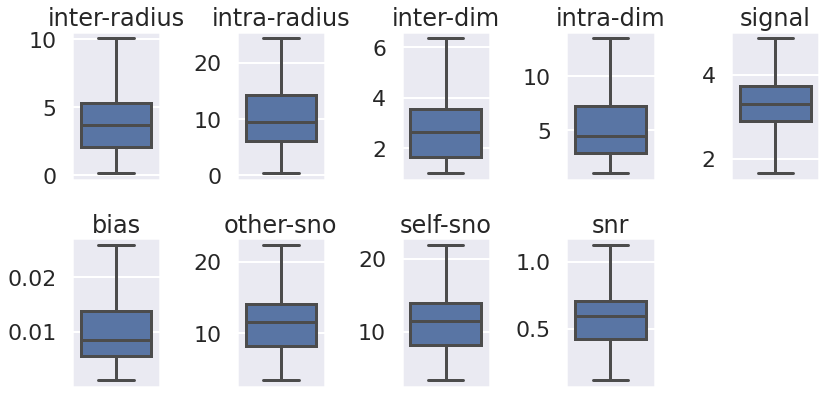

In [8]:
fig, axs = plot_metrics_categorical(kind='box', data=data, x=None, ys=metric_columns, 
                                    labels=metric_short_labels, 
                                    plt_kwargs={'showfliers': False}, 
                                    fig_kwargs={'figsize': (12, 6)})
plt.show()

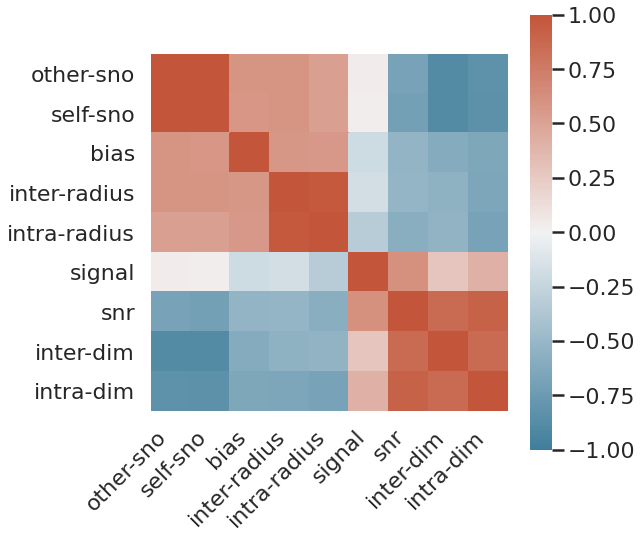

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
results = data[metric_columns].rename(columns=metric_label_map)
plot_corr_heatmap(data=results, ax=ax, method='spearman')
plt.show()

---
# Untrained vs. Supervised Object Classification

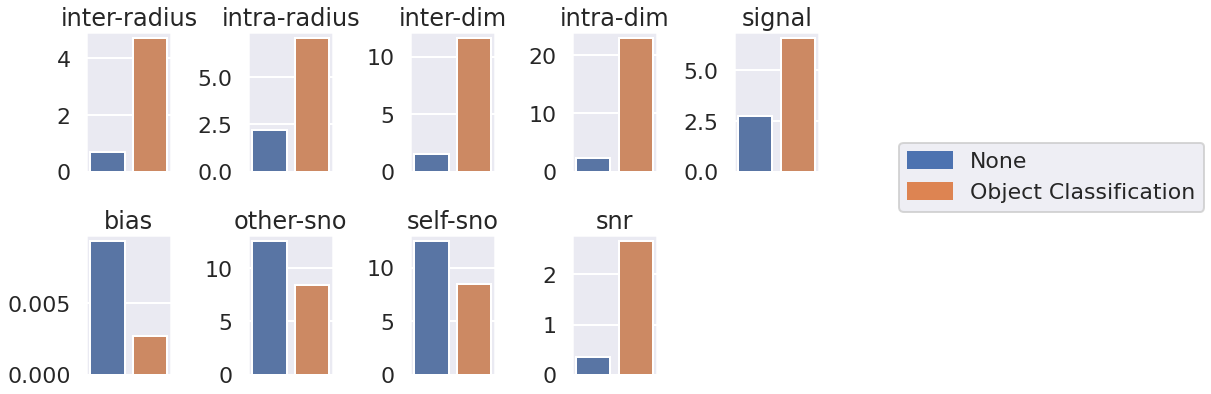

In [38]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet18') & 
               (data.layer == 'layer4.1.relu')]

fig, axs = plot_metrics_categorical(kind='bar', data=results, x='task', ys=metric_columns, 
                                    labels=metric_short_labels, fig_kwargs={'figsize': (12, 6)})
plt.show()

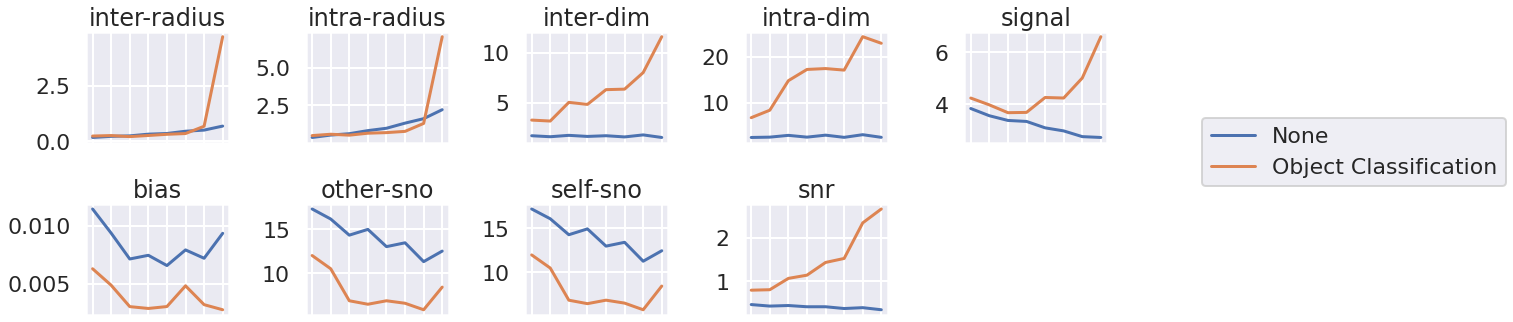

In [39]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet18')]

fig, axs = plot_metrics_trend(data=results, x='layer', ys=metric_columns, hue='task', 
                              labels=metric_short_labels, fig_kwargs={'figsize': (16, 5)})
plt.show()

---
# Yamins Self-Supervised

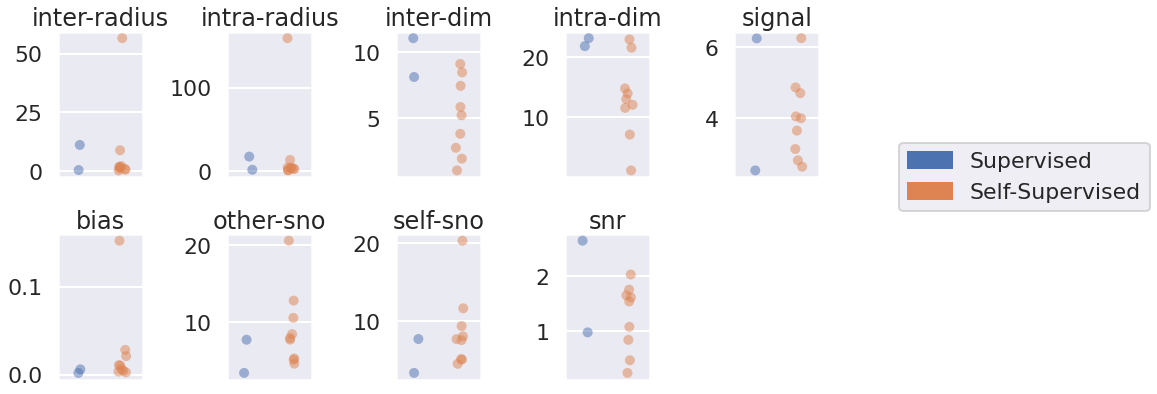

In [40]:
results = data[(data.source == 'VVS') & 
               (data.layer == 'layer4.1.relu')]

fig, axs = plot_metrics_categorical(kind='strip', data=results, x='kind', ys=metric_columns, 
                                    labels=metric_short_labels, 
                                    plt_kwargs={'alpha': 0.5, 'size': 10}, 
                                    fig_kwargs={'figsize': (12, 6)})
plt.show()

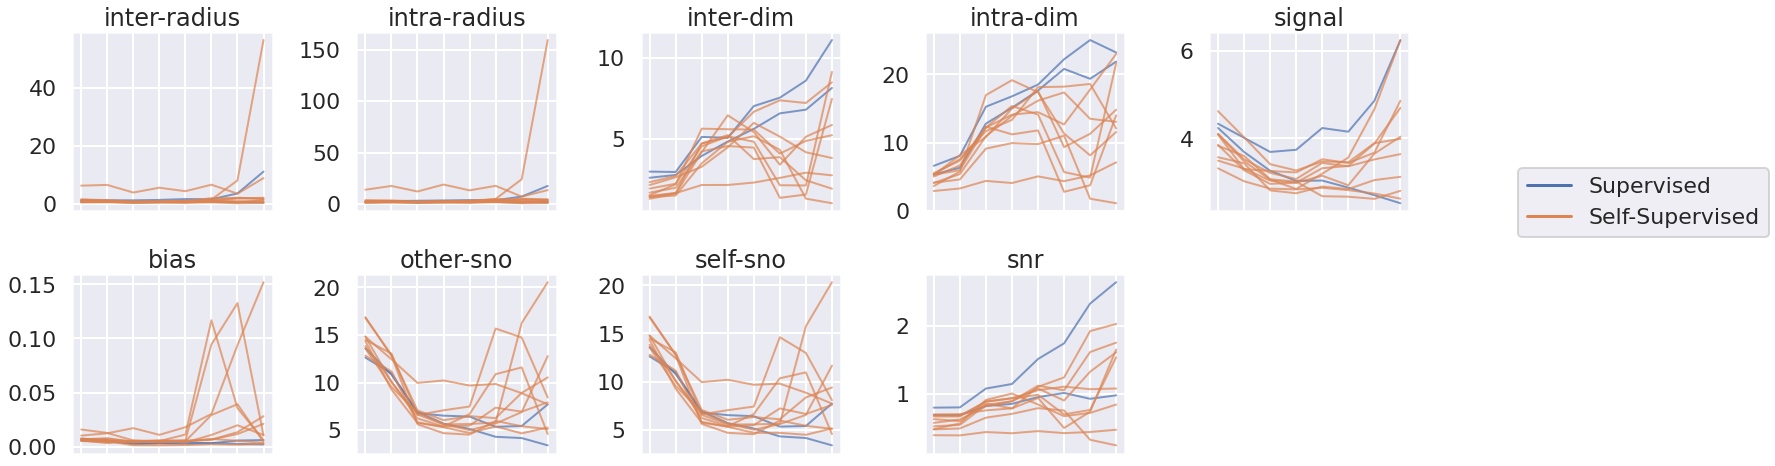

In [41]:
results = data[(data.source == 'VVS')]

fig, axs = plot_metrics_trend(data=results, x='layer', ys=metric_columns, hue='kind', 
                              labels=metric_short_labels, 
                              plt_kwargs={'units': 'task', 'estimator': None, 'lw': 2, 'alpha': 0.7}, 
                              fig_kwargs={'figsize': (20, 7)})
plt.show()

---
# Taskonomy

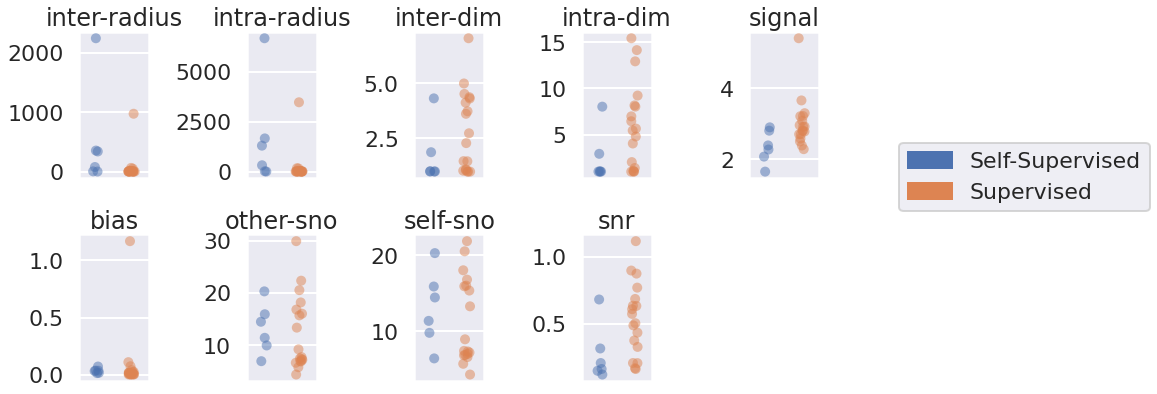

In [42]:
results = data[(data.source == 'Taskonomy') & 
               (data.layer == 'layer4.1.relu')]

fig, axs = plot_metrics_categorical(kind='strip', data=results, x='kind', ys=metric_columns, 
                                    labels=metric_short_labels, 
                                    plt_kwargs={'alpha': 0.5, 'size': 10}, 
                                    fig_kwargs={'figsize': (12, 6)})
plt.show()

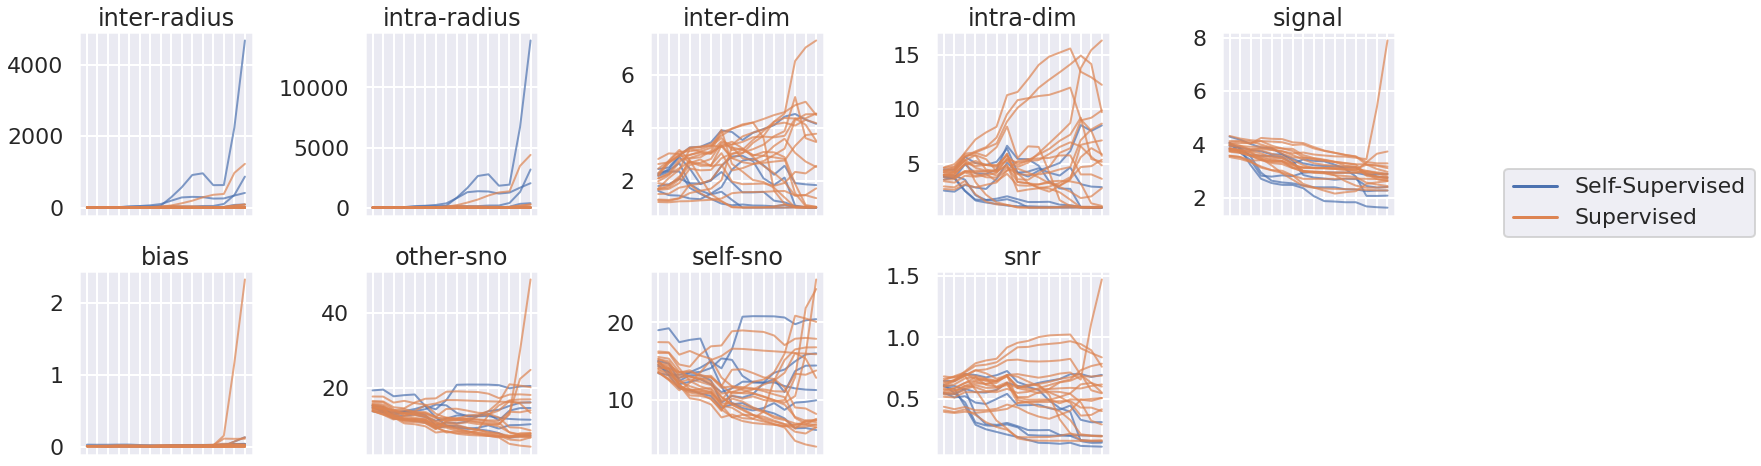

In [43]:
results = data[(data.source == 'Taskonomy')]

fig, axs = plot_metrics_trend(data=results, x='layer', ys=metric_columns, hue='kind', 
                              labels=metric_short_labels, 
                              plt_kwargs={'units': 'task', 'estimator': None, 'lw': 2, 'alpha': 0.7}, 
                              fig_kwargs={'figsize': (20, 7)})
plt.show()